## SciPy

SciPy에서 확률 분포 기능을 사용하려면,

1. 우선 해당 확률 분포에 대한 확률 분포 객체를 생성하고,
1. 이 객체의 메서드를 호출한다.

또한, 객체 생성 명령들은 scipy.stats 서브패키지에 포함되어 있다.

In [1]:
%matplotlib inline
import scipy as sp

In [2]:
# 가우시안 정규 분포 객체 생성
rv = sp.stats.norm()
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

### 모수 지정
확률 분포 객체를 생성할 때는 분포의 형상을 구체적으로 지정하는 모수(parameter)를 인수로 지정해 주어야 한다. 
> 대부분 다음과 같지만 일부 다를 수 있다.
- `loc` : 일반적으로 분포의 기댓값
- `scale` : 일반적으로 분포의 표준편차

In [3]:
rv = sp.stats.norm(loc=1, scale=2) # 기댓값1, 표준편차2 인 정규 분포 객체 생성

### 확률 분포 메서드

|메서드| 기능 |
| --|-- | | |
|`pdf`| 확률 밀도 함수(probability density function)|
|`pmf`| 확률 질량 함수(probability mass function)|
|`cdf`| 누적 분포 함수(culmulative distribution function)|
|`rvs`| 랜덤 샘플 생성(random variable sampling)|


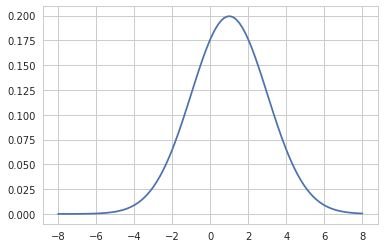

In [4]:
xx = np.linspace(-8, 8, 100) # -8부터 8까지 100개의 샘플 생성
#linspace: Return evenly spaced numbers over a specified interval
pdf = rv.pdf(xx) #확률 밀도 함수, 샘플 범위를 넣어주어야 한다.
plt.plot(xx, pdf)
plt.show()

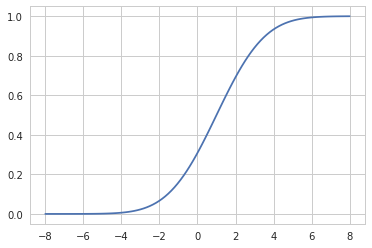

In [5]:
xx = np.linspace(-8, 8, 100) # -8부터 8까지 100개의 샘플 생성
#linspace: Return evenly spaced numbers over a specified interval
cdf = rv.cdf(xx) #누적 분포 함수
plt.plot(xx, cdf)
plt.show()

## 랜덤 샘플 생성
랜덤 샘플의 경우 `rvs` 메서드를 사용한다. 
- parameter는 size(샘플의 크기)와 random_state(샘플 생성 seed 값)을 받는다.

In [6]:
rv.rvs(size=(2, 4), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ],
       [ 4.73511598, -0.95455576,  2.90017684,  0.69728558]])

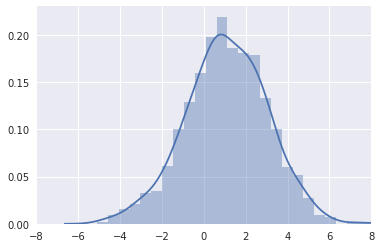

In [7]:
sns.set()
sns.distplot(rv.rvs(size=1000, random_state=1))
plt.xlim(-8, 8)
plt.show()

---

## 베르누이 분포

### 베르누이 시도
결과가 성공, 실패 둘 중 하나로만 나오는 것을 베르누이 시도라고 한다. ex)동전던지기

베르누이 시도의 결과를 확률 변수 $X$로 나타낼 때는 일반적으로 성공을 정수 1, 실패는 정수 0 으로 정한다. 때로는 실패를 0이아닌 -1로 정하는 경우도 있다.

### 베르누이 분포

베르누이 확률 변수는 0, 1 두 가지 값 중 하나만 가질 수 있으므로 이산 확률 변수이다. 따라서 확률 질량 함수(pmf; probability mass function)으로 정의할 수 있다.

베르누이 확률 분포의 pmf는 다음과 같다. $\theta$는 1이 나올 확률을 의미.

$$\text{Bern}(x;\theta) = 
\begin{cases} 
\theta   & \text{if }x=1, \\
1-\theta & \text{if }x=0
\end{cases} $$

하나의 수식으로 표현하면 다음과 같다.

$$ \text{Bern}(x;\theta) = \theta^x(1-\theta)^{(1-x)}$$

만약 1, 0 이 아닌 1, -1 값을 가진다면 다음과 같다.

$$\text{Bern}(x;\theta) = \theta^{(1+x)/2}(1-\theta)^{(1-x)/2}$$

### 베르누이 분포의 모멘트

#### 기댓값

$$ E[X] = \theta $$

(증명)

$$ E[X] = \sum x_iP(x_i) = 1 \cdot \theta + 0 \cdot (1 - \theta) = \theta $$
- 1과 0을 쓸 때의 장점이다.

#### 분산

$$ Var[X] = \theta(1- \theta) $$

(증명)

$$ Var[X] = \sum (x_i-\mu)^2P(x_i) = (1-\theta)^2\cdot\theta + (0-\theta)^2\cdot(1-\theta) = \theta(1-\theta)$$

### SciPy
Scipy stats 서브 패키지에 있는 `bernoulli`클래스로 베르누이 확률 분포를 만든다. `p`인수로 분포의 모수 $\theta$를 설정한다.

`pmf` 메서드를 이용한다. (이산 확률 분포 -> 확률 질량 함수)

In [8]:
theta = 0.6 #확률 설정
rv = sp.stats.bernoulli(theta)

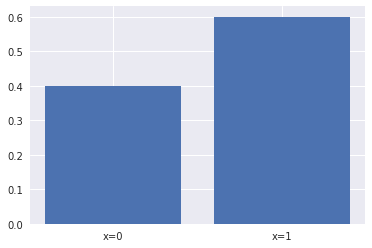

In [9]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xticks([0, 1], ["x=0", "x=1"])
plt.show()

- `rvs`메서드로 시뮬레이션 (random variable sampling)
- countplot으로 시각화

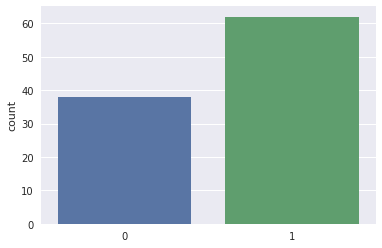

In [10]:
x = rv.rvs(100, random_state=0)
sns.countplot(x)
plt.show()

#### 이론적 확률 분포와 샘플의 확률 분포를 동시에 나타내기

In [11]:
y = np.bincount(x, minlength=2)/float(len(x))

df = pd.DataFrame({'theory':rv.pmf(xx), 'simulation':y})
df.index=[0, 1]
df

,simulation,theory
0,0.38,0.4
1,0.62,0.6


In [12]:
df2 = df.stack().reset_index() # stack
df2.columns = ["sample", 'type', 'ratio']
df2

,sample,type,ratio
0,0,simulation,0.38
1,0,theory,0.40
2,1,simulation,0.62
3,1,theory,0.60


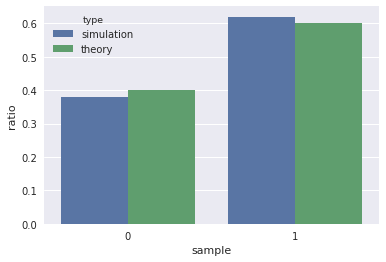

In [13]:
sns.barplot(x='sample', y='ratio', hue='type', data=df2)
plt.show()

- 샘플 평균, 샘플 분산 계산

In [14]:
np.mean(x), np.var(x, ddof=1) # ddorf : 자유도

(0.62, 0.23797979797979804)

In [15]:
sp.stats.describe(x)

DescribeResult(nobs=100, minmax=(0, 1), mean=0.62, variance=0.23797979797979804, skewness=-0.4944513860581973, kurtosis=-1.755517826825128)

### 연습.
베르누이 확률 분포의 모수가 다음과 같을 때, 
샘플 갯수 10개, 1000개인 경우에 대해 기댓값, 분산, cdf와 비교한 카운트 플롯 구하기
1. $\theta = 0.5 $
2. $\theta = 0.9 $

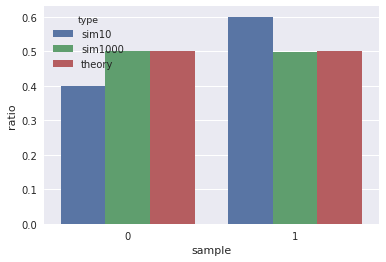

In [16]:
rv = sp.stats.bernoulli(0.5) # 베르누이 확률 분포 생성
xx = [0, 1] #범위 지정
x = rv.rvs(10) # 샘플 갯수 지정
x2 = rv.rvs(1000)
y = np.bincount(x, minlength=2)/float(len(x)) # 0, 1 나누어 카운트 (ndarray반환)
y2 = np.bincount(x2, minlength=2)/float(len(x2))
df = pd.DataFrame({'theory':rv.pmf(xx), 'sim10':y, 'sim1000':y2})
df.index=[0, 1]
df = df.stack().reset_index()
df.columns=['sample', 'type', 'ratio']
sns.barplot(x='sample', y = 'ratio', hue='type', data=df)
plt.show()

In [17]:
print(sp.stats.describe(x))
sp.stats.describe(x2)

DescribeResult(nobs=10, minmax=(0, 1), mean=0.59999999999999998, variance=0.26666666666666672, skewness=-0.40824829046386274, kurtosis=-1.8333333333333335)


DescribeResult(nobs=1000, minmax=(0, 1), mean=0.499, variance=0.25024924924924924, skewness=0.004000008000023974, kurtosis=-1.9999839999359996)

---

## 이항 분포 (binomial distribution)

성공확률이 $\theta$인 베르누이 시도를 $N$번 하는 경우를 생각해보자. $N$번 중 성공한 횟수를 확률 변수 $X$라고 한다면 $X$값은 0부터 $N$까지의 정수 중 하나가 될 것이다.

이러한 확률 변수를 이항 분포를 따르는 확률 변수라고 한다.

$$ X \sim \text{Bin}(x; N, \theta)$$

이항 확률 분포를 수식으로 묘사해 보자.

0 또는 1이 나오는 베르누이 확률 분포를 따르는 확률 변수 $Y$를 가정한다.

$$ Y \sim \text{Bern}(y; \theta)$$

이 확률 변수의 $N$개의 샘플을 $y_1, y_2, \cdots, y_N $라고 하자. 
이 값들은 모두 0 아니면 1 이라는 값을 가지기 때문에 $N$번 중 성공한 횟수는 $N$개의 샘플 값의 총합이다.

$$ \text{N번 중 성공한 횟수} =\sum_{i=1}^{N} y_i = x $$

수식으로 쓰면 다음과 같다. $()$ 기호는 조합(combination), $!$ 는 팩토리얼(factorial)

$$ \text{Bin}(x;N,\theta) = \binom N x  \theta^x(1-\theta)^{N-x} $$

$$\binom N x =\dfrac{N!}{x!(N-x)!}$$

### 이항 분포의 모멘트

#### 기댓값
$$E[X] = N\theta $$
(증명)
$$ E[X] = E\left[ \sum_{i=1}^{N}\text{Bern}_i\right] = \sum_{i=1}^{N}E\left[\text{Bern}_i \right] = N\theta$$

$\text{Bern}_i$ 는 $i$번째 시도의 결과로 나온 숫자로써 서로 독립인 베르누이 분포이다.

#### 분산
$$ Var[X] = N\theta(1-\theta) $$

(증명)
$$
\text{Var}[X] = \text{Var} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{Var}[ \text{Bern}_i ] = N\theta(1-\theta)$$

---

### SciPy
binom 클래스로 이항 분포를 만든다.

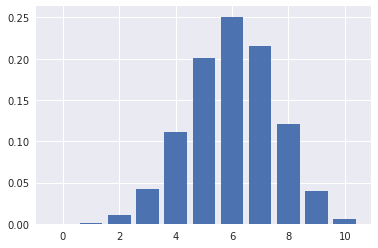

In [18]:
N = 10 #반복수
theta = 0.6 #확률
rv = sp.stats.binom(N, theta) # 이항 분포 생성
xx = np.arange(N+1) #범위 설정 (0~N)
plt.bar(xx, rv.pmf(xx), align='center')
plt.show()

`rvs`메서드로 시뮬레이션 생성

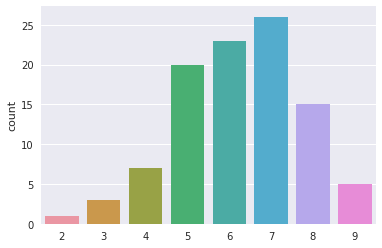

In [19]:
sns.countplot(rv.rvs(100))
plt.show()

### ideal과 sample 동시 표현

In [20]:
y = np.bincount(rv.rvs(100), minlength=N+1)/float(len(rv.rvs(100)))
df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["sample", "type", "ratio"]
# df.pivot("sample", "type", "ratio")
df.tail()

,sample,type,ratio
17,8,theory,0.120932
18,9,simulation,0.050000
19,9,theory,0.040311
20,10,simulation,0.010000
21,10,theory,0.006047


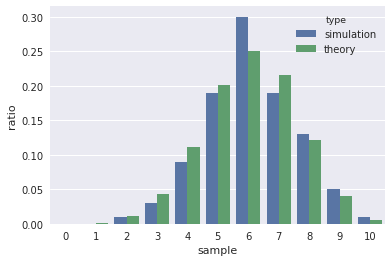

In [21]:
sns.barplot(x='sample', y='ratio', hue='type', data=df)
plt.show()

### 연습.
이항 확률 분포의 모수가 다음과 같을 때, 각각 샘플 생성후 기댓값, 분산, cdf와 비교한 카운트 플롯 출력. 샘플 갯수가 10개, 1000개인 경우에 대해 각각 계산

1. $\theta=0.5, N = 5$
1. $\theta=0.9, N = 20$

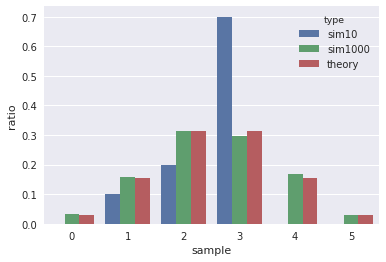

In [22]:
N = 5
rv = sp.stats.binom(N, 0.5)
xx = np.arange(N+1)
x, x2 = rv.rvs(10), rv.rvs(1000)
y = np.bincount(x, minlength=N+1)/float(len(x))
y2 = np.bincount(x2, minlength=N+1)/float(len(x2))
df = pd.DataFrame({"theory": rv.pmf(xx), "sim10": y, 'sim1000':y2}).stack()
df = df.reset_index()
df.columns = ["sample", "type", "ratio"]
sns.barplot(x='sample', y='ratio', hue='type', data=df)
plt.show()

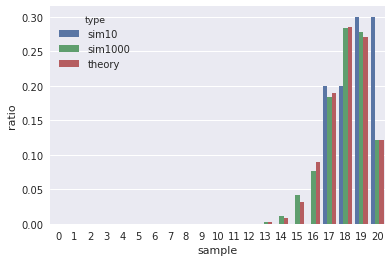

In [23]:
N = 20
rv = sp.stats.binom(N, 0.9)
xx = np.arange(N+1)
x, x2 = rv.rvs(10), rv.rvs(1000)
y = np.bincount(x, minlength=N+1)/float(len(x))
y2 = np.bincount(x2, minlength=N+1)/float(len(x2))
df = pd.DataFrame({"theory": rv.pmf(xx), "sim10": y, 'sim1000':y2}).stack()
df = df.reset_index()
df.columns = ["sample", "type", "ratio"]
sns.barplot(x='sample', y='ratio', hue='type', data=df)
plt.show()

---